In [1]:
%load_ext autoreload
%autoreload 2

In [196]:
import pandas
import numpy
import matplotlib.pyplot as plt
import itertools
import sklearn

In [3]:
import loan_approval_lib
from loan_approval_lib import logspace, linspace

In [4]:
data = loan_approval_lib.load_original_data()

In [5]:
data

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [6]:
len(data)

32581

Load test dataset from competition (synthetic) dataset

In [146]:
data_test = loan_approval_lib.load_data()['test']

In [147]:
data_test

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,58645,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2
1,58646,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4
2,58647,26,30000,RENT,5.0,VENTURE,E,4000,17.19,0.13,Y,2
3,58648,33,50000,RENT,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7
4,58649,26,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
39093,97738,22,31200,MORTGAGE,2.0,DEBTCONSOLIDATION,B,3000,10.37,0.10,N,4
39094,97739,22,48000,MORTGAGE,6.0,EDUCATION,A,7000,6.03,0.15,N,3
39095,97740,51,60000,MORTGAGE,0.0,PERSONAL,A,15000,7.51,0.25,N,25
39096,97741,22,36000,MORTGAGE,4.0,PERSONAL,D,14000,15.62,0.39,Y,4


In [7]:
data_loan_status_deny = data[data['loan_status'] == 1]
data_loan_status_approve = data[data['loan_status'] == 0]

# Plot Credit History

In [25]:
column = 'cb_person_cred_hist_length'

data_loan_status_deny[column].min(), data_loan_status_deny[column].max()

(np.int64(2), np.int64(30))

In [26]:
column = 'cb_person_cred_hist_length'

data_loan_status_approve[column].min(), data_loan_status_approve[column].max()

(np.int64(2), np.int64(30))

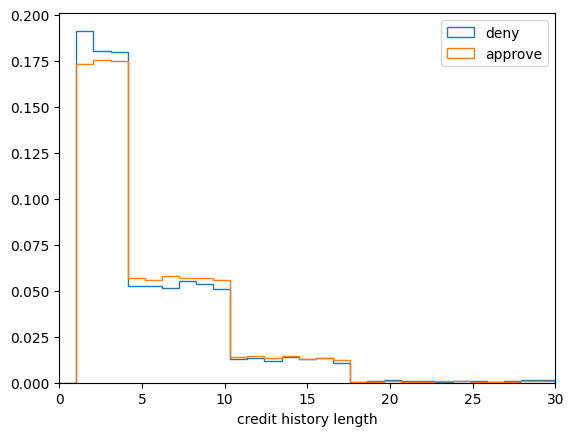

In [32]:
column = 'cb_person_cred_hist_length'

h_data_deny = data_loan_status_deny[column]
h_data_accept = data_loan_status_approve[column]

_ = plt.hist(
    h_data_deny,
    bins=numpy.linspace(0, 30, 30), #logspace(data_train_loan_status_deny[column]),
    histtype='step',
    density=True,
    label='deny',
)
_ = plt.hist(
    h_data_accept,
    bins=numpy.linspace(0, 30, 30), #logspace(data_train_loan_status_accept[column]),
    histtype='step',
    density=True,
    label='approve',
)
plt.xlim(left=0, right=30)
plt.xlabel('credit history length')
#plt.xscale('log')
plt.legend()
None
#plt.yscale('log')

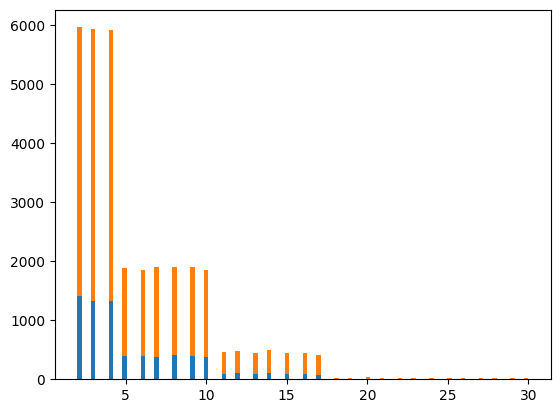

In [18]:
plt.figure()
_ = plt.hist(
    [data_loan_status_deny[column], data_loan_status_approve[column]],
    stacked=True,
    bins=100,
)

# Plot person age

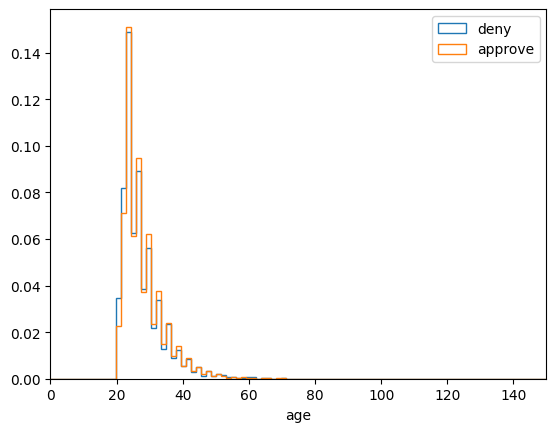

In [36]:
column = 'person_age'

h_data_deny = data_loan_status_deny[column]
h_data_accept = data_loan_status_approve[column]

_ = plt.hist(
    h_data_deny,
    bins=numpy.linspace(0, 150, 100), #logspace(data_train_loan_status_deny[column]),
    histtype='step',
    density=True,
    label='deny',
)
_ = plt.hist(
    h_data_accept,
    bins=numpy.linspace(0, 150, 100), #logspace(data_train_loan_status_accept[column]),
    histtype='step',
    density=True,
    label='approve',
)
plt.xlabel('age')
plt.xlim(left=0, right=150)
#plt.xscale('log')
plt.legend()
None
#plt.yscale('log')

# Income

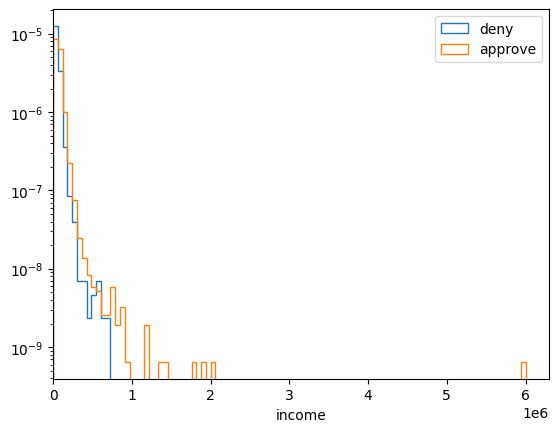

In [44]:
column = 'person_income'

h_data_deny = data_loan_status_deny[column]
h_data_accept = data_loan_status_approve[column]

max_ = max(h_data_accept.max(), h_data_deny.max())

_ = plt.hist(
    h_data_deny,
    bins=numpy.linspace(0, max_, 100), #logspace(data_train_loan_status_deny[column]),
    histtype='step',
    density=True,
    label='deny',
)
_ = plt.hist(
    h_data_accept,
    bins=numpy.linspace(0, max_, 100), #logspace(data_train_loan_status_accept[column]),
    histtype='step',
    density=True,
    label='approve',
)
plt.xlabel('income')
plt.xlim(left=0)
plt.yscale('log')
plt.legend()
None
#plt.yscale('log')

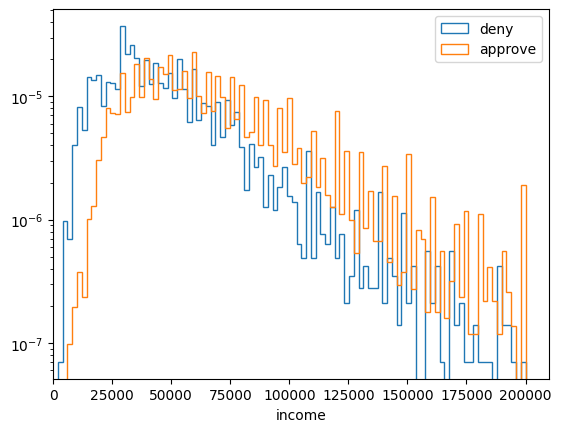

In [46]:
column = 'person_income'

h_data_deny = data_loan_status_deny[column]
h_data_accept = data_loan_status_approve[column]

max_ = 2.0e5

_ = plt.hist(
    h_data_deny,
    bins=numpy.linspace(0, max_, 100), #logspace(data_train_loan_status_deny[column]),
    histtype='step',
    density=True,
    label='deny',
)
_ = plt.hist(
    h_data_accept,
    bins=numpy.linspace(0, max_, 100), #logspace(data_train_loan_status_accept[column]),
    histtype='step',
    density=True,
    label='approve',
)
plt.xlabel('income')
plt.xlim(left=0)
plt.yscale('log')
plt.legend()
None
#plt.yscale('log')

# Loan Percentage of Income

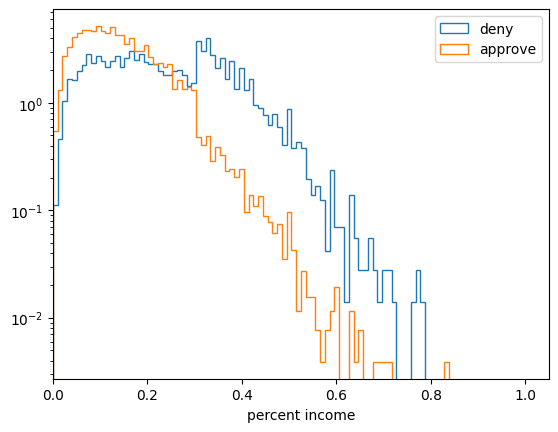

In [48]:
column = 'loan_percent_income'

h_data_deny = data_loan_status_deny[column]
h_data_approve = data_loan_status_approve[column]

max_ = 1.0 #max(h_data_accept.max(), h_data_deny.max())

_ = plt.hist(
    h_data_deny,
    bins=numpy.linspace(0, max_, 100), #logspace(data_train_loan_status_deny[column]),
    histtype='step',
    density=True,
    label='deny',
)
_ = plt.hist(
    h_data_approve,
    bins=numpy.linspace(0, max_, 100), #logspace(data_train_loan_status_accept[column]),
    histtype='step',
    density=True,
    label='approve',
)
plt.xlabel('percent income')
plt.xlim(left=0)
plt.yscale('log')
plt.legend()
None
#plt.yscale('log')

In [56]:
column = 'loan_percent_income'

h_data_deny = data_loan_status_deny[column]
h_data_approve = data_loan_status_approve[column]

hist_data_deny, _ = numpy.histogram(
    h_data_deny,
    numpy.linspace(0, 1, 100),
    density=True,
)

hist_data_approve, bins = numpy.histogram(
    h_data_approve,
    numpy.linspace(0, 1, 100),
    density=True,
)   

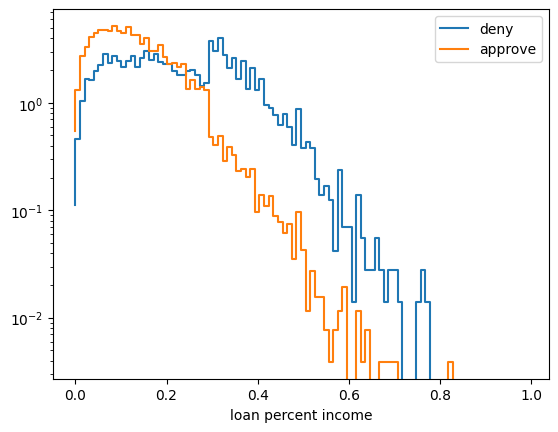

In [150]:
plt.step(
    bins[:-1],
    hist_data_deny,
    label='deny',
)
plt.step(
    bins[:-1],
    hist_data_approve,
    label='approve',
)
plt.yscale('log')
plt.xlabel('loan percent income')
plt.legend()
None

In [63]:
hist_data_model = hist_data_approve / (hist_data_approve + hist_data_deny)

/tmp/ipykernel_134359/1893349480.py:1: RuntimeWarning: invalid value encountered in divide
  hist_data_model = hist_data_approve / (hist_data_approve + hist_data_deny)


In [69]:
hist_data_model = numpy.nan_to_num(hist_data_model)

In [70]:
hist_data_model

array([0.83002476, 0.74023248, 0.72398421, 0.66560656, 0.71674956,
       0.69268028, 0.67818293, 0.625113  , 0.6664292 , 0.65558277,
       0.6549471 , 0.67360931, 0.67433157, 0.60843357, 0.6646645 ,
       0.57346402, 0.56991543, 0.54860948, 0.51271499, 0.59157503,
       0.53670267, 0.49969006, 0.54066905, 0.54409408, 0.55771933,
       0.40713225, 0.44928039, 0.42359052, 0.49581902, 0.46681503,
       0.11315364, 0.11795867, 0.10856008, 0.09316081, 0.15294125,
       0.11085638, 0.12243773, 0.08903998, 0.13229503, 0.10366553,
       0.06908585, 0.07784435, 0.10305781, 0.13239655, 0.10449607,
       0.11033455, 0.07383899, 0.10976348, 0.07969712, 0.0996915 ,
       0.10207857, 0.02629389, 0.06746329, 0.07383899, 0.10040895,
       0.04444   , 0.03007213, 0.1568489 , 0.04693143, 0.21816396,
       0.        , 0.        , 0.07724576, 0.06521101, 0.21816396,
       0.        , 0.        , 0.12243773, 0.21816396, 0.12243773,
       0.12243773, 0.        , 0.        , 0.        , 0.     

In [84]:
window_size = 10
w = numpy.ones(window_size) / window_size
w

array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

In [120]:
hist_data_model_pad = numpy.pad(hist_data_model, (window_size-1, 0), mode='edge')
hist_data_model_pad

array([0.83002476, 0.83002476, 0.83002476, 0.83002476, 0.83002476,
       0.83002476, 0.83002476, 0.83002476, 0.83002476, 0.83002476,
       0.74023248, 0.72398421, 0.66560656, 0.71674956, 0.69268028,
       0.67818293, 0.625113  , 0.6664292 , 0.65558277, 0.6549471 ,
       0.67360931, 0.67433157, 0.60843357, 0.6646645 , 0.57346402,
       0.56991543, 0.54860948, 0.51271499, 0.59157503, 0.53670267,
       0.49969006, 0.54066905, 0.54409408, 0.55771933, 0.40713225,
       0.44928039, 0.42359052, 0.49581902, 0.46681503, 0.11315364,
       0.11795867, 0.10856008, 0.09316081, 0.15294125, 0.11085638,
       0.12243773, 0.08903998, 0.13229503, 0.10366553, 0.06908585,
       0.07784435, 0.10305781, 0.13239655, 0.10449607, 0.11033455,
       0.07383899, 0.10976348, 0.07969712, 0.0996915 , 0.10207857,
       0.02629389, 0.06746329, 0.07383899, 0.10040895, 0.04444   ,
       0.03007213, 0.1568489 , 0.04693143, 0.21816396, 0.        ,
       0.        , 0.07724576, 0.06521101, 0.21816396, 0.     

In [121]:
len(hist_data_model_pad)

108

In [122]:
hist_data_model_pad[80:] = 0

In [142]:
hist_data_model_smooth = numpy.convolve(hist_data_model_pad, w, mode='valid')
hist_data_model_smooth = numpy.roll(hist_data_model_smooth, -(window_size-1)//2)
hist_data_model_smooth[80:] = 0
len(hist_data_model_smooth)

99

In [143]:
len(hist_data_model)

99

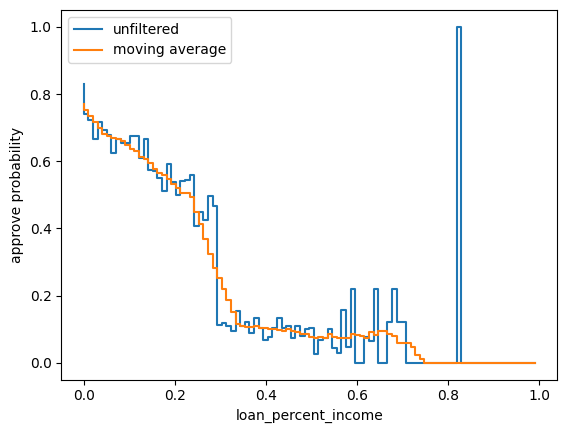

In [237]:
plt.step(
    bins[:-1],
    hist_data_model,
    label='unfiltered',
)
plt.step(
    bins[:-1],
    hist_data_model_smooth,
    label='moving average',
)
_ = plt.legend()
_ = plt.xlabel('loan_percent_income')
_ = plt.ylabel('approve probability')

This is the total number of events distribution

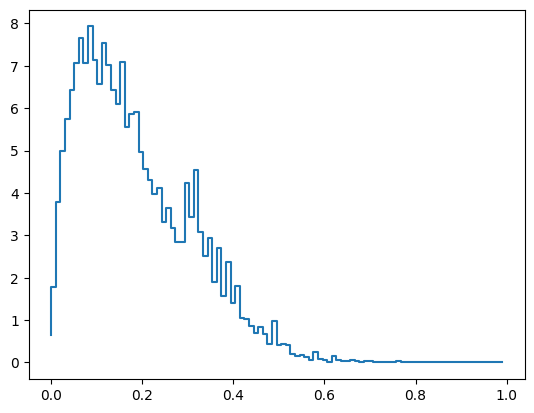

In [221]:
_ = plt.step(
    bins[:-1],
    hist_data_approve + hist_data_deny,
)

#### Use the smooth data to predict output

In [153]:
hist_data_model_smooth

array([0.76893769, 0.7537535 , 0.73326233, 0.71690277, 0.69945857,
       0.68195081, 0.67528849, 0.67032323, 0.66460593, 0.65939742,
       0.6474758 , 0.63664905, 0.6289987 , 0.61362727, 0.6072265 ,
       0.59540206, 0.57801013, 0.56464388, 0.55820993, 0.54751541,
       0.53088224, 0.51881873, 0.50631684, 0.50462724, 0.49215124,
       0.44979634, 0.4116232 , 0.3684123 , 0.32331897, 0.28284117,
       0.25321358, 0.22052931, 0.18707426, 0.15072186, 0.11440691,
       0.11000013, 0.1059887 , 0.10543847, 0.10936205, 0.10451753,
       0.10446535, 0.09960547, 0.10167782, 0.09641803, 0.09602063,
       0.0993199 , 0.09416485, 0.0906054 , 0.08474965, 0.08434093,
       0.07775148, 0.07337479, 0.07808333, 0.07480677, 0.08665401,
       0.07644616, 0.07381677, 0.07479501, 0.07393221, 0.08570772,
       0.08126372, 0.0782565 , 0.07481538, 0.09193864, 0.08236601,
       0.09460979, 0.09460979, 0.08688521, 0.08036411, 0.05854772,
       0.05854772, 0.05854772, 0.04630394, 0.02448755, 0.01224

In [152]:
data_test['loan_percent_income']

0        0.36
1        0.10
2        0.13
3        0.14
4        0.15
         ... 
39093    0.10
39094    0.15
39095    0.25
39096    0.39
39097    0.44
Name: loan_percent_income, Length: 39098, dtype: float64

In [159]:
import copy
data_test_predict = copy.copy(data_test[['id', 'loan_percent_income']])

In [224]:
data_test_predict['loan_status'] = numpy.interp(
    data_test_predict['loan_percent_income'].to_numpy(),
    bins[:-1],
    hist_data_model_smooth,
)

In [225]:
data_test_predict.sort_values('loan_percent_income')

,id,loan_status,loan_percent_income
39063,97708,0.768938,0.00
13981,72626,0.768938,0.00
34007,92652,0.768938,0.00
36960,95605,0.768938,0.00
24983,83628,0.753905,0.01
...,...,...,...
7541,66186,0.078760,0.59
32520,91165,0.083930,0.60
26342,84987,0.081151,0.63
30659,89304,0.081151,0.63


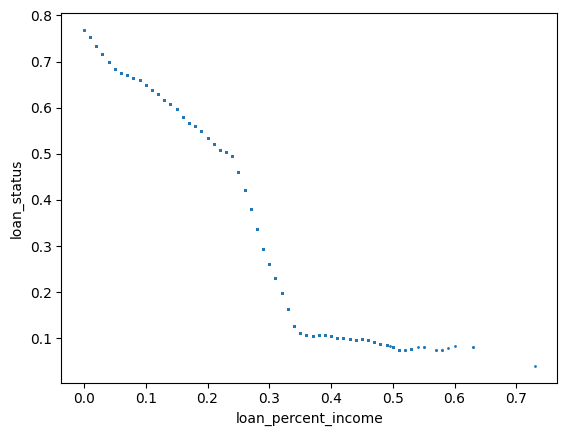

In [226]:
_ = plt.scatter(
    data_test_predict['loan_percent_income'],
    data_test_predict['loan_status'],
    s=1,
)
_ = plt.xlabel('loan_percent_income')
_ = plt.ylabel('loan_status')

Check that the model is producing sensible values. Show the histogram of inputs and scatter plot of outputs.

In [244]:
numpy.sort(data_test_predict['loan_percent_income'].unique())

array([0.   , 0.01 , 0.02 , 0.03 , 0.04 , 0.05 , 0.06 , 0.07 , 0.08 ,
       0.09 , 0.1  , 0.11 , 0.12 , 0.13 , 0.14 , 0.15 , 0.16 , 0.17 ,
       0.18 , 0.19 , 0.2  , 0.21 , 0.22 , 0.23 , 0.24 , 0.25 , 0.26 ,
       0.27 , 0.28 , 0.29 , 0.3  , 0.31 , 0.32 , 0.33 , 0.34 , 0.35 ,
       0.36 , 0.37 , 0.38 , 0.39 , 0.4  , 0.41 , 0.42 , 0.43 , 0.44 ,
       0.45 , 0.46 , 0.47 , 0.48 , 0.49 , 0.496, 0.5  , 0.51 , 0.52 ,
       0.53 , 0.54 , 0.55 , 0.57 , 0.58 , 0.59 , 0.6  , 0.63 , 0.73 ])

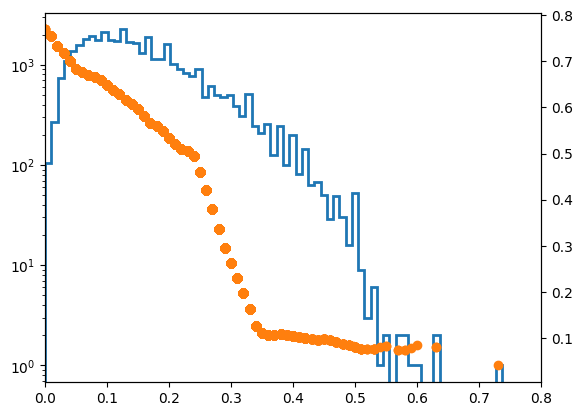

In [252]:
_ = plt.hist(
    data_test_predict['loan_percent_income'],
    bins=numpy.linspace(0,1,100),
    histtype='step',
    linewidth=2,
)
_ = plt.yscale('log')
_ = plt.twinx()
_ = plt.scatter(
    data_test_predict['loan_percent_income'],
    data_test_predict['loan_status'],
    color='tab:orange',
)
_ = plt.xlim(xmin=0, xmax=0.8)

When producing the output, need to predict the probability of loan reject

In [241]:
tmp = copy.copy(data_test_predict)
tmp['loan_status_inverse'] = 1.0 - tmp['loan_status']
tmp.rename(
    columns={
        'loan_status': 'loan_status_p_approve',
        'loan_status_inverse': 'loan_status',
    },
    inplace=True,
)

tmp[['id', 'loan_status']].to_csv('data_test_predict_original_1.csv', index=False)

tmp

,id,loan_status_p_approve,loan_percent_income,loan_status
0,58645,0.107433,0.36,0.892567
1,58646,0.648668,0.10,0.351332
2,58647,0.615626,0.13,0.384374
3,58648,0.608123,0.14,0.391877
4,58649,0.597176,0.15,0.402824
...,...,...,...,...
39093,97738,0.648668,0.10,0.351332
39094,97739,0.597176,0.15,0.402824
39095,97740,0.460385,0.25,0.539615
39096,97741,0.106407,0.39,0.893593


Test the interpolation function

In [229]:
numpy.interp(
    [0.1, 0.5, 0.9],
    bins[:-1],
    hist_data_model_smooth,
)

array([0.64866796, 0.08104621, 0.        ])

# Logistic Regression

In [230]:
x = data['loan_percent_income'].to_numpy().reshape(-1, 1)
y = data['loan_status'].to_numpy()

In [231]:
model = sklearn.linear_model.LogisticRegression()
clf = model.fit(x, y)

In [232]:
clf.score(x, y)

0.8127743163193272

In [233]:
x1 = data_test['loan_percent_income'].to_numpy().reshape(-1, 1)
y1 = clf.predict_proba(x1)

y1.shape

(39098, 2)

In [235]:
data_test_predict_logistic = pandas.DataFrame(
    {
        'id': data_test['id'],
        'loan_status': y1[:, 1],
        'loan_percent_income': x1[:, 0],
    }
)
data_test_predict_logistic.sort_values('loan_percent_income')

,id,loan_status,loan_percent_income
39063,97708,0.054473,0.00
13981,72626,0.054473,0.00
34007,92652,0.054473,0.00
36960,95605,0.054473,0.00
24983,83628,0.058866,0.01
...,...,...,...
7541,66186,0.880401,0.59
32520,91165,0.888790,0.60
26342,84987,0.910932,0.63
30659,89304,0.910932,0.63


In [236]:
data_test_predict_logistic[['id', 'loan_status']].to_csv('data_test_predict_original_1-logistic.csv', index=False)

### Check the `loan_percent_income` column

- It is identical to the loan amount divided by income, in almost all cases. There are a few rows where the values differ. ~ 1000 / 32000

In [177]:
data[['person_income', 'loan_amnt', 'loan_percent_income']]

,person_income,loan_amnt,loan_percent_income
0,59000,35000,0.59
1,9600,1000,0.10
2,9600,5500,0.57
3,65500,35000,0.53
4,54400,35000,0.55
...,...,...,...
32576,53000,5800,0.11
32577,120000,17625,0.15
32578,76000,35000,0.46
32579,150000,15000,0.10


In [183]:
pandas.DataFrame(data['loan_amnt'] / data['person_income'])

,0
0,0.593220
1,0.104167
2,0.572917
3,0.534351
4,0.643382
...,...
32576,0.109434
32577,0.146875
32578,0.460526
32579,0.100000


In [193]:
tmp = pandas.concat(
    [
        data[['person_income', 'loan_amnt', 'loan_percent_income']],
        pandas.DataFrame(data['loan_amnt'] / data['person_income']).round(decimals=2),
    ],
    axis=1,
)
tmp['diff'] = tmp['loan_percent_income'] - tmp[0]
tmp[tmp['diff'] != 0]

,person_income,loan_amnt,loan_percent_income,0,diff
4,54400,35000,0.55,0.64,-0.09
17,92111,35000,0.32,0.38,-0.06
36,48000,30000,0.63,0.62,0.01
40,62050,30000,0.41,0.48,-0.07
48,66300,30000,0.38,0.45,-0.07
...,...,...,...,...,...
32480,62050,25000,0.34,0.40,-0.06
32485,24000,3000,0.13,0.12,0.01
32542,200000,3000,0.01,0.02,-0.01
32555,80000,18000,0.23,0.22,0.01


In [194]:
len(tmp[tmp['diff'] != 0])

1010

In [195]:
tmp['diff'].max()

np.float64(0.010000000000000009)

### Scatter Plot of `loan_percent_income` vs `loan_approval` for Train and Test Datasets

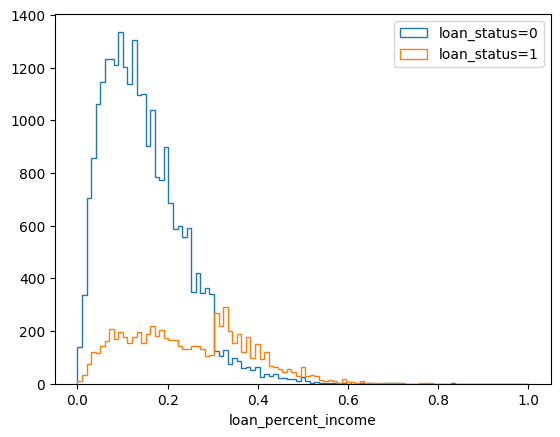

In [218]:
_ = plt.hist(
    data[data['loan_status'] == 0]['loan_percent_income'],
    histtype='step',
    bins=numpy.linspace(0, 1, 100),
    label='loan_status=0',
)
_ = plt.hist(
    data[data['loan_status'] == 1]['loan_percent_income'],
    histtype='step',
    bins=numpy.linspace(0, 1, 100),
    label='loan_status=1',
)
_ = plt.legend()
_ = plt.xlabel('loan_percent_income')

In [209]:
data_train = loan_approval_lib.load_data()['train']

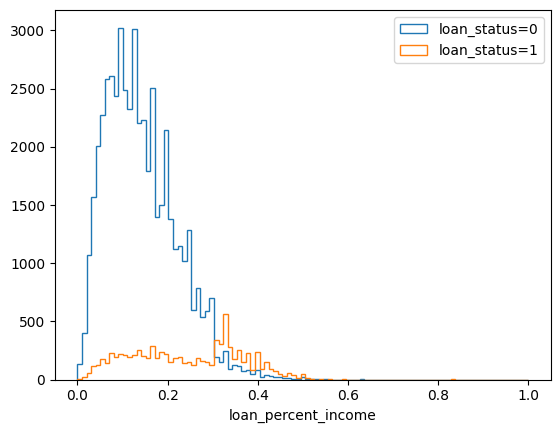

In [219]:
_ = plt.hist(
    data_train[data_train['loan_status'] == 0]['loan_percent_income'],
    histtype='step',
    bins=numpy.linspace(0, 1, 100),
    label='loan_status=0',
)
_ = plt.hist(
    data_train[data_train['loan_status'] == 1]['loan_percent_income'],
    histtype='step',
    bins=numpy.linspace(0, 1, 100),
    label='loan_status=1',
)
_ = plt.legend()
_ = plt.xlabel('loan_percent_income')